
## About this project


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from selenium import webdriver
import pandas as pd
import time
import random
import sys
import os
import numpy as np
sys.path.append(os.path.abspath('../'))
from utils import (soup_content_from_url,
                    elements_from_soup_bestsellers_web, 
                    subcategories_from_bestsellers_web,
                    detail_dict_from_product_page,
                    load_obj,
                    save_obj)

# EDA

Estadisticos:
* Describe district
* 

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
houses = pd.read_csv("dataframe_house.csv")
apartments = pd.read_csv("dataframe_apartment.csv")
lands = pd.read_csv("dataframe_land.csv")

In [8]:
df = pd.concat([houses,apartments,lands])
remax = df[df.agency.str.lower().str.contains("remax")]
remax.head(3)

,ref_id,neighborhood,district,province,price,currency,amount,url,description,totalArea,bedrooms,bathrooms,floorArea,agency,property_type,source_web,scrapped_date,has_water,has_electricity,has_gas
7,inmueble-17515-1714,Ayacucho 130,Capital,Mendoza,US$ 69.000,US$,69000.0,/17515-remax-solutions/inmuebles/1714/ficha/ca...,Corredor Responsable: VICTOR E. MONTIVERO - C....,disable,3,2,disable,REMAX Solutions,PropertyType.HOUSE,inmoclick,2020-07-18,NaN,NaN,NaN
51,inmueble-52708-564,Los Peralitos,Lujan de Cuyo,Mendoza,US$ 220.000,US$,220000.0,/52708-remax-chacras/inmuebles/564/ficha/casa-...,Corredor Responsable: Nestor Andres Guerrero -...,disable,3,2,disable,REMAX CHACRAS,PropertyType.HOUSE,inmoclick,2020-07-18,NaN,NaN,NaN
52,inmueble-52708-336,B° Unión y Fuerza,Lujan de Cuyo,Mendoza,$ 2.800.000,$,2800000.0,/52708-remax-chacras/inmuebles/336/ficha/casa-...,Corredor Responsable: Nestor Andres Guerrero -...,disable,4,2,disable,REMAX CHACRAS,PropertyType.HOUSE,inmoclick,2020-07-18,NaN,NaN,NaN


In [9]:
remax.currency = df.currency.fillna('consultar')

In [10]:
remax.district.unique()
print(f"Cantidad total de propiedades originales:{len(remax)}")
gran_mendoza_list = ['Godoy Cruz', 'Maipu', 'Lujan de Cuyo', 'Las Heras', 'Capital',
       'Carrodilla', 'Guaymallen', 'Chacras de Coria',
       'Vistalba', 'Mayor Drummond', 'Perdriel', 'La Puntilla']
remax = remax[remax.district.isin(gran_mendoza_list)]
print(f"Cantidad total de propiedades en el Gran Mendoza:{len(remax)}")

Cantidad total de propiedades originales:930
Cantidad total de propiedades en el Gran Mendoza:876


In [13]:
df = remax

### Composicion por tipo de moneda

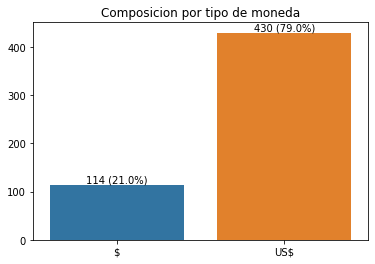

In [14]:
curr = df.groupby('currency').count().ref_id.sort_values()
share = round(curr/curr.sum()*100,1)
g = sns.barplot(x=curr.index.values,y=curr.values)
for i,row in enumerate(curr.iteritems()):
    bar_text = f'{row[1]} ({share.iloc[i]}%)'
    g.text(i,row[1], bar_text, color='black', ha="center",va='bottom')
    
g.set_title('Composicion por tipo de moneda')
plt.show()

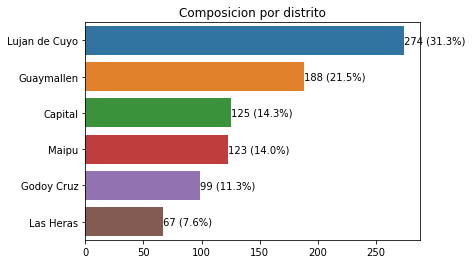

In [15]:
districts = df.groupby('district').count().ref_id.sort_values(ascending=False)
share = round(districts/districts.sum()*100,1)
g = sns.barplot(x=districts.values,y=districts.index.values)

for i,row in enumerate(districts.iteritems()):
    bar_text = f'{row[1]} ({share.iloc[i]}%)'
    g.text(row[1],i, bar_text, color='black', ha="left",va='center',rotation=0)
g.set_title('Composicion por distrito')
plt.show()

### Composicion por inmobiliaria

total agencies:3


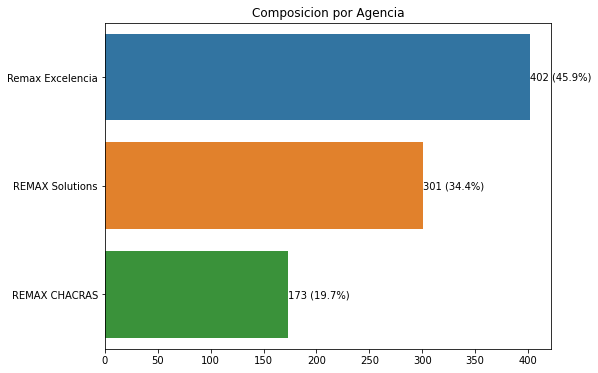

In [17]:
agency = df.groupby("agency").count().ref_id.sort_values(ascending= False)
share = round(agency/agency.sum()*100,1)
print("total agencies:"+str(len(agency)))

agency = agency.head(30)
plt.figure(figsize=(8,6))
g = sns.barplot(x=agency.values, y=agency.index.values)

for i,row in enumerate(agency.iteritems()):
    bar_text = f'{row[1]} ({share.iloc[i]}%)'
    g.text(row[1],i, bar_text, color='black', ha="left",va='center',rotation=0)
g.set_title('Composicion por Agencia')
plt.show()

In [20]:
list(df.url.values)

['/17515-remax-solutions/inmuebles/1714/ficha/casa-en-venta-en-ayacucho-130?btid=3419445',
 '/52708-remax-chacras/inmuebles/564/ficha/casa-en-venta-en-los-peralitos?btid=3419445',
 '/52708-remax-chacras/inmuebles/336/ficha/casa-en-venta-en-b0-union-y-fuerza?btid=3419445',
 '/17515-remax-solutions/inmuebles/1579/ficha/casa-en-venta-en-pringles?btid=3419445',
 '/17515-remax-solutions/inmuebles/1726/ficha/casa-en-venta-en-kartin-club-lujan?btid=3419445',
 '/52708-remax-chacras/inmuebles/574/ficha/casa-en-venta-en-barrio-parque-drummond?btid=3419445',
 '/52708-remax-chacras/inmuebles/555/ficha/casa-en-venta-en-elpidio-gonzalez-4581?btid=3419445',
 '/17515-remax-solutions/inmuebles/1211/ficha/casa-en-venta-en-dalvian?btid=3419445',
 '/1626-remax-excelencia/inmuebles/9119/ficha/casa-en-venta-en-natania-47-luzuriaga?btid=3419445',
 '/1626-remax-excelencia/inmuebles/9139/ficha/casa-en-venta-en-50-seccion?btid=3419445',
 '/17515-remax-solutions/inmuebles/1805/ficha/casa-en-venta-en-gobernador-o

In [19]:
df.floorArea.unique()

array(['disable', nan], dtype=object)

### Creating totalArea ranges

In [17]:
# Percent of disables
100.0 * len(df[df['totalArea']=='disable'])/len(df)

11.05105105105105

In [18]:
# Fixing types
# Removing disables
df = df[df['totalArea']!='disable']
# Removing string chars in totalArea
df['totalArea_fixed'] = df.totalArea.str.replace('mts2','').str.replace('m2','').str.replace('m','')
df.totalArea_fixed = df.totalArea_fixed.str.strip()
def cast_to_comma(value):
    if len(value)>= 3 and value[-3]==".":
        return value.replace(".",',')
    else:
        return value
df.totalArea_fixed = df.totalArea_fixed.apply(lambda x: cast_to_comma(x))
print(df[['totalArea_fixed','totalArea']])
df.totalArea_fixed = df.totalArea_fixed.str.replace('.', '')
df.totalArea_fixed = df.totalArea_fixed.str.replace(',', '.')
df.totalArea_fixed = pd.to_numeric(df.totalArea_fixed, errors='coerce')

     totalArea_fixed totalArea
0                400       400
1                220       220
2                475       475
3                802       802
4                500       500
...              ...       ...
3451             752       752
3452             423       423
3453             840       840
3454             280       280
3455             540       540

[2962 rows x 2 columns]


In [19]:
# Percent of floorArea in disable
100.0 * len(df[df['floorArea']=='disable'])/len(df)

0.0337609723160027

In [20]:
len(df[df['url'].str.contains("depart")])/len(df)

0.0006752194463200541

In [22]:
# Removing disables
df = df[df['floorArea']!='disable']
df['floorArea_fixed'] = df.floorArea.str.replace('mts2','').str.replace('m2','').str.replace('m','')
df.floorArea_fixed = df.floorArea_fixed.str.strip()
def cast_to_comma(value):
    if isinstance(value,str) and len(value)>= 3 and value[-3]==".":
        return value.replace(".",',')
    else:
        return value
df.floorArea_fixed = df.floorArea_fixed.apply(lambda x: cast_to_comma(x))
print(df[['floorArea_fixed','floorArea']])
df.floorArea_fixed = df.floorArea_fixed.str.replace('.', '')
df.floorArea_fixed = df.floorArea_fixed.str.replace(',', '.')
df.floorArea_fixed = pd.to_numeric(df.floorArea_fixed, errors='coerce')
# Avoid apartments with less of 10 square meters
df = df[df.floorArea_fixed >= 10]

     floorArea_fixed floorArea
0                268       268
1                190       190
2                200       200
3                244       244
4                310       310
...              ...       ...
3451             313       313
3452             225       225
3453             350       350
3454              95        95
3455             300       300

[2956 rows x 2 columns]


In [37]:
def bucketizer(df, bucket_limits, field, new_field):
    prev_limit = None
    ranges = []
    for i,limit in enumerate(bucket_limits):
        if i==0:
            df.loc[df[field] <= limit, new_field] = 0
            ranges = ["0.."+str(limit)]
        elif i==len(bucket_limits)-1:
            df.loc[np.logical_and(df[field] > prev_limit,df[field] <= limit), new_field] = prev_limit
            ranges.append(str(prev_limit)+".."+str(limit))
            
            df.loc[df[field] > limit, new_field] = limit
            ranges.append(str(limit)+"..")
        else:
            df.loc[np.logical_and(df[field] > prev_limit,df[field] <= limit), new_field] = prev_limit
            ranges.append(str(prev_limit)+".."+str(limit))
        prev_limit = limit
    return ranges

In [42]:
"""
Casas - Superficie cubierta m2:
    - 90..120
    - 120..240
    - 240..
"""
bucket_separators = [90,120,240]
#field = "totalArea_fixed"
field = "floorArea_fixed"
new_field="house_range"
ranges = bucketizer(df, bucket_separators, field, new_field)
ranges

['0..90', '90..120', '120..240', '240..']

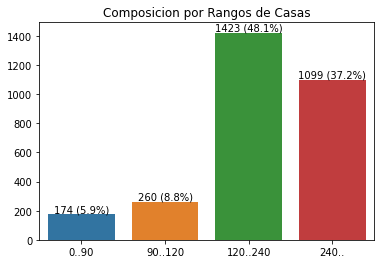

In [45]:
house_range = df.groupby('house_range').count().ref_id#.sort_values(ascending=False)
share = round(house_range/house_range.sum()*100,1)
g = sns.barplot(x=ranges, y=house_range.values)

for i,row in enumerate(house_range.iteritems()):
    bar_text = f'{row[1]} ({share.iloc[i]}%)'
    g.text(i, row[1], bar_text, color='black', ha="center",va='bottom',rotation=0)
g.set_title('Composicion por Rangos de Casas')
plt.show()

In [46]:
df["squared_meter_amount"] = df.amount/df.floorArea_fixed

In [47]:
#district_landr = (df[df['currency']=='US$'].groupby(["district","land_range"])
#.agg({'squared_meter_amount':['mean'],'ref_id':['count']}))
pd.pivot_table(df[df['currency']=='US$'],
               values=['squared_meter_amount','ref_id'],
               index='district',
               columns='depto_range',
               aggfunc={'squared_meter_amount':'mean',
                        'ref_id':'count'}).style.format("{:.1f}")

### Removing outliers

In [54]:
from scipy import stats
dolarized = df[df['currency']=='US$']
print(f"dolarized with outliers {len(dolarized)}")
z_scores = stats.zscore(dolarized.amount)
abs_z_scores = np.abs(z_scores)
dolarized = dolarized[(abs_z_scores < 3)]

z_scores = stats.zscore(dolarized.floorArea_fixed)
abs_z_scores = np.abs(z_scores)
dolarized = dolarized[(abs_z_scores < 3)]
print(f"dolarized without outliers {len(dolarized)}")

dolarized with outliers 2347
dolarized without outliers 2324


In [55]:
pd.pivot_table(dolarized,
               values=['squared_meter_amount','ref_id'],
               index='district',
               columns='depto_range',
               aggfunc={'squared_meter_amount':'mean',
                        'ref_id':'count'}).style.format("{:.1f}")

In [72]:
df[np.logical_and(df.district=='Chacras de Coria',df.depto_range==0.0)].url.values

array(['/11248-openhouse-negocios-inmobiliarios/inmuebles/2136/ficha/departamento-en-venta-en-panamericana-chacras-de-coria-complejo-del-oeste?btid=3419443',
       '/46192-wonder/inmuebles/827/ficha/departamento-en-venta-en-cercanias-jumbo-chacras?btid=3419443'],
      dtype=object)

In [27]:
lujan = df[df['currency']=='US$']
lujan = lujan[lujan.land_range==1000]
lujan = lujan[lujan['district']== 'Chacras de Coria']
lujan[['price','amount','totalArea','totalArea_fixed']].head(30)
#df[df.index==791].url.values

AttributeError: 'DataFrame' object has no attribute 'land_range'

### Abierto por departamentos

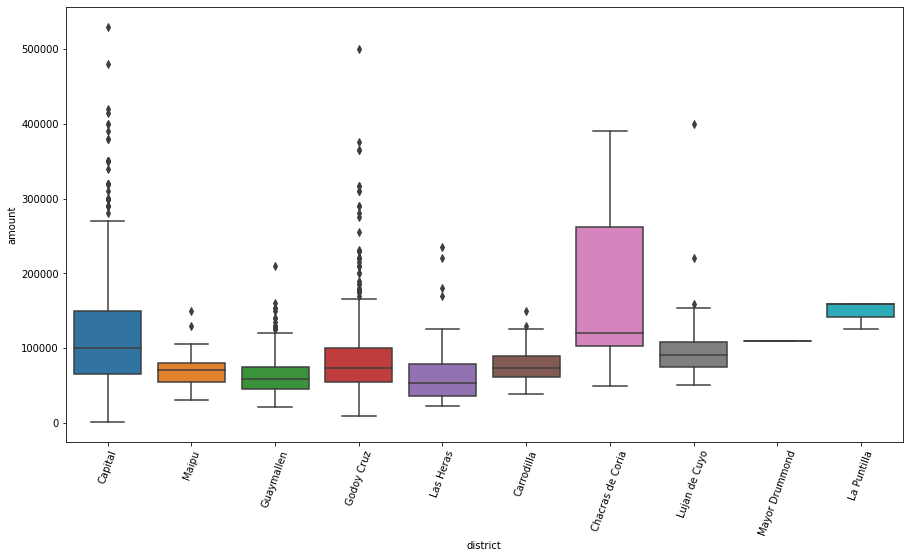

In [40]:
plt.figure(figsize=(15,8))
g = sns.boxplot(x=dolarized[dolarized.currency=='US$']['district'], y=df['amount'])
g.set_xticklabels(g.get_xticklabels(),rotation=70)
plt.show()

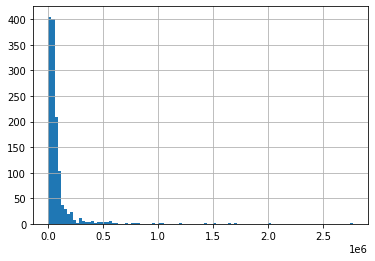

In [77]:
df[df.currency=='US$'].amount.hist(bins=100)

In [78]:
import numpy as np
#df[np.logical_and(df['amount']<30000,df['amount']>0)].sort_values(by='amount')
df[df.description.str.contains("2018")].description

13      Gold Group Argentina® Vende!!\nMagníficos lote...
16      Gold Group Argentina® Vende!\nExcelentes lotes...
59      GOLD GROUP !!! VENDE !!! \nHermoso lote comple...
60      GOLD GROUP ARGENTINA® VENDE!!\nFantásticos y e...
61      GOLD GROUP ARGENTINA® VENDE!!\n\nLotes desde 4...
                              ...                        
1847    GOLD GROUP VENDE! LOTE EN "LOTEO AMPA" \nEL MI...
1898    EXCELENTE TERRENO EN GODOY CRUZ IDEAL PARA DES...
1899    GOLD GROUP ARGENTINA® VENDE!\nCalle Colombia y...
1948    LOTE EN BARRIO PRIVADO PALMARES VALLEY\nLAS JA...
2030    GOLD GROUP vende 8 selectos lotes en este excl...
Name: description, Length: 81, dtype: object

In [79]:
str(df[df.index==3175].url.values)

'[]'

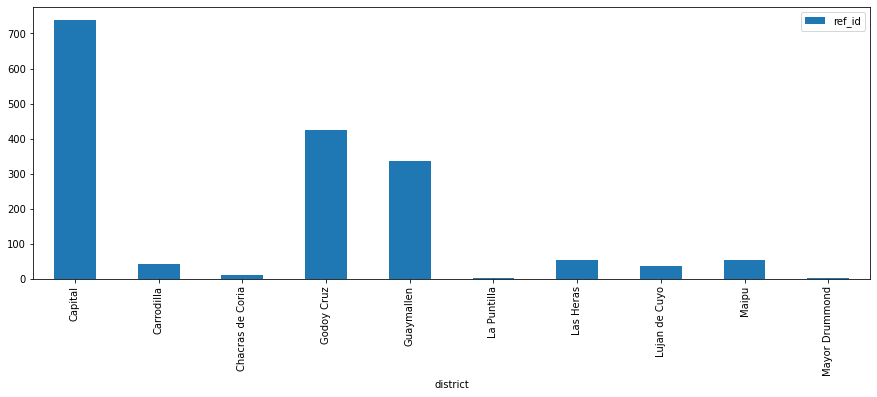

In [41]:
dolarized.groupby('district').count().plot.bar(y='ref_id',figsize=(15,5))

In [33]:
dfdol = df[df.currency=='US$'].reset_index(drop=True)
dfdol['r_10'] = round(dfdol.recent_id/100)
h = dfdol.groupby('r_10').mean()
#pd.pivot_table(h,values,index='r_10',columns,aggfunc)

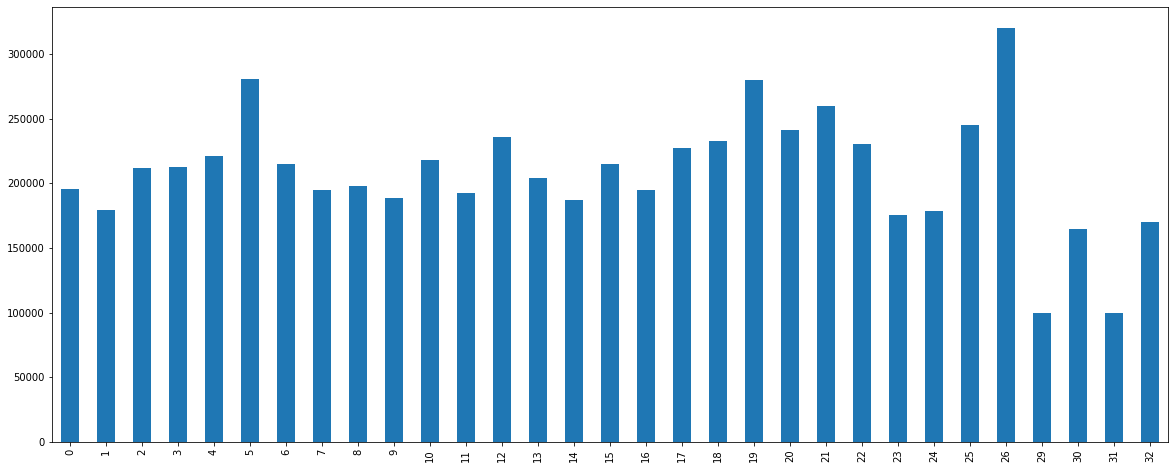

In [34]:
plt.figure(figsize=(20,8))
h.index = h.index.astype(int)
h['amount'].plot.bar()

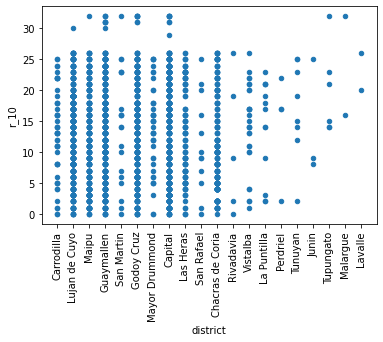

In [42]:
dfdol.plot.scatter(x='district',y='r_10',rot=90)

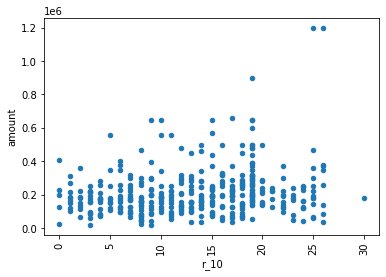

In [46]:
dfdol[dfdol.district=='Lujan de Cuyo'].plot.scatter(x='r_10',y='amount',rot=90)

In [68]:
import numpy as np
pd.set_option('display.max_columns', 30)
list(dfdol[dfdol['r_20']==3].url)

['https://www.inmoclick.com.ar/71779-greenwood/inmuebles/82/ficha/casa-en-venta-en-acceso-este-y-arturo-gonzalez?btid=2465480',
 'https://www.inmoclick.com.ar/71779-greenwood/inmuebles/84/ficha/casa-en-venta-en-juan-agustin-maza-y-azcuenaga?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1479/ficha/casa-en-venta-en-b0-privado-bucci-bandera-de-los-andes-y-rosario?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1500/ficha/casa-en-venta-en-laguna-horcones-1054-barrio-fuchs?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1508/ficha/casa-en-venta-en-vicente-gil-539?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1515/ficha/casa-en-venta-en-rufino-ortega-y-martinez-de-rozas?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-group-argentina/inmuebles/1518/ficha/casa-en-venta-en-p-benegas-691?btid=2465480',
 'https://www.inmoclick.com.ar/17636-gold-g

In [175]:
df2 = df[df['totalArea']!='disable']
df2.totalArea = df2.totalArea.str.replace('mts2','').str.replace('m2','').str.replace('m','')
df2.totalArea = df2.totalArea.str.strip()
df2 = df2[~df2['totalArea'].str.contains('2.852.61')]
df2.totalArea = df2['totalArea'].str.replace(',','.')

In [176]:
df2.totalArea = df2.totalArea.astype(float)

In [177]:
df2.floorArea[df2.floorArea.str.contains('\,')]

295     301,24m2
1142     57,78m2
1144     80,00m2
1204    411,00m2
1427    69,10 m2
1475    65,83 m2
1484       334,3
1675       97,15
1759    453,85m2
1760    258,32m2
1800      135,53
2006      170,47
2083    221,50m2
3038       483,6
3074      299,35
3089    313,58m2
Name: floorArea, dtype: object

In [178]:
df2 = df2[df2['floorArea']!='disable']
df2 = df2[df2['floorArea']!='140/60']
df2.floorArea = (df2.floorArea.str.replace('mts2','')
                             .str.replace('m2','')
                             .str.replace('m','')
                             .str.replace('aprox.con cocher','')
                             .str.replace('aprox.','')
                             .str.replace(',',''))
df2.floorArea = df2.floorArea.astype(float)

In [179]:
df2.loc[df2['totalArea'] >= 4000,'totalArea']=4000

In [205]:
chacras = df2[np.logical_and(df2['district']=='Chacras de Coria',df2.currency=='US$')]

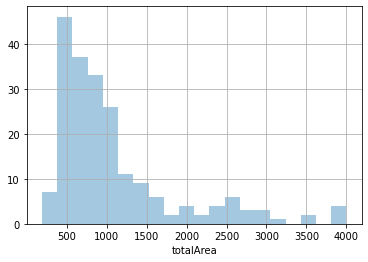

In [232]:
import seaborn as sns
g = sns.distplot(chacras.totalArea,bins=20,kde=False)
g.grid()

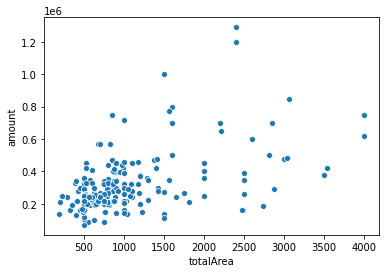

In [208]:
sns.scatterplot(x="totalArea", y="amount", data=chacras)

In [230]:
chacras['amountr'] = pd.qcut(chacras.amount,5)

/home/chanchus/developments/amz-scrapper/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


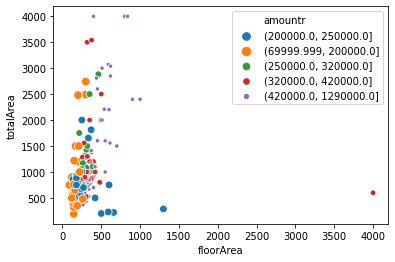

In [231]:
sns.scatterplot(x="floorArea", y="totalArea",hue="amountr", size="amountr", data=chacras)

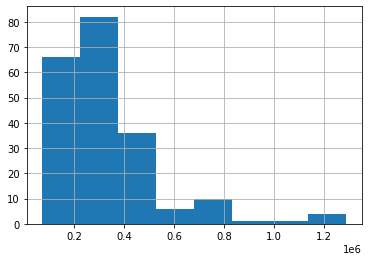

In [217]:
chacras.amount.hist(bins=8)

In [2]:
import pandas as pd

In [5]:
df1 = pd.DataFrame([['Buenos Aires',63,16,89,55],
				['Atlanta',17,29,81,17],
				['Brasil',88,82,9, 64]])
df1.columns=['Airport','A','B','C','D']
df1 = df1.set_index('Airport')

df2 = pd.DataFrame([['Buenos Aires',21,38,36],
		['Atlanta',54,88,80],
		['Brasil',44,53,53],
		['Madrid',24,58,29]])
df2.columns=['Airport','B','C','D']
df2 = df2.set_index('Airport')


,B,C,D
Airport,,,
Buenos Aires,21,38,36
Atlanta,54,88,80
Brasil,44,53,53
Madrid,24,58,29


In [6]:
df1.merge(df2, left_index=True,right_index=True)

,A,B_x,C_x,D_x,B_y,C_y,D_y
Airport,,,,,,,
Buenos Aires,63,16,89,55,21,38,36
Atlanta,17,29,81,17,54,88,80
Brasil,88,82,9,64,44,53,53
